In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig


In [2]:
raw_data = pd.read_csv('Part3_data.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()
raw_accel = raw_data[:,2]
raw_force = raw_data[:,4]
raw_time = raw_data[:,0]


In [3]:
accel_interp = interp1d(raw_time, raw_accel, kind="linear")
force_interp = interp1d(raw_time, raw_force, kind="linear")

start_time = 2.1
stop_time = 9.2
step_size = 0.005
time = np.arange(start_time, stop_time, step_size)

accel = accel_interp(time)
force = force_interp(time)


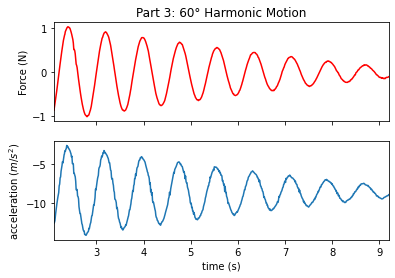

In [4]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(start_time, stop_time)
axarr[0].plot(time, force,'r')
axarr[0].set_title('Part 3: 60° Harmonic Motion')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time, accel)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('acceleration $(m/s^2)$')
plt.show()


In [5]:
# Defines the various oscillator models that we fit to:

# Simple harmonic motion using acceleration
def simple_a(t, A, B, w, phi):                  # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B - A * (w**2) * np.cos(w*t + phi)   # output: acceleration


# Velocity-dependent friction using acceleration
def vdamped_a(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))   # output: acceleration

Ainit, Binit, winit, phiinit, betainit=[0.045, -9.84, 7.93, -3.4, 0.19]


In [6]:
oscillator_model = simple_a

start_pars=[Ainit, Binit, winit, phiinit]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi] = pars
std_errs = np.sqrt(np.diag(cov))
[A_err, B_err, w_err, phi_err] = std_errs

print(np.transpose([pars, std_errs]))
T = 2*np.pi/w
print("Oscillation period: ", T)

accel_pred = oscillator_model(time, A, B, w, phi)


[[ 4.90154014e-02  6.40986048e-04]
 [-8.44849620e+00  2.88191124e-02]
 [ 7.99628573e+00  6.33980147e-03]
 [-3.44306950e+00  3.77313150e-02]]
Oscillation period:  0.7857629806734675


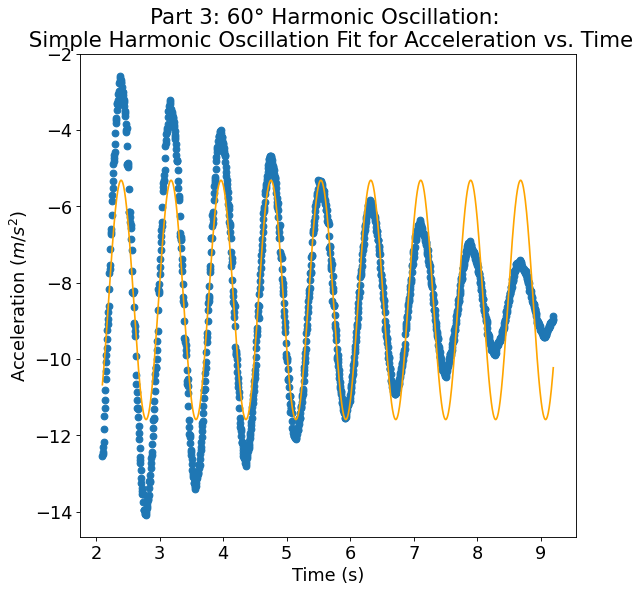

In [7]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(time, accel)
plt.plot(time, accel_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

# Axes label and title
plt.title("Part 3: 60° Harmonic Oscillation: \n Simple Harmonic Oscillation Fit for Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
# plt.legend(loc='upper right', prop={'size': 13})
plt.show()


In [12]:
oscillator_model = vdamped_a

start_pars=[Ainit, Binit, winit, phiinit, betainit]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi, beta] = pars
std_errs = np.sqrt(np.diag(cov))
[A_err, B_err, w_err, phi_err, beta_err] = std_errs

print(np.transpose([pars, std_errs]))
print("Damping factor: ", beta)
T = 2*np.pi/w
print("Oscillation period: ", T)

accel_pred = oscillator_model(time, A, B, w, phi, beta)


[[ 1.65685896e-01  9.74775166e-04]
 [-8.51728737e+00  5.38708722e-03]
 [ 7.98767859e+00  1.30878117e-03]
 [-3.46402994e+00  5.55627045e-03]
 [ 2.31149393e-01  1.34789315e-03]]
Damping factor:  0.23114939332455725
Oscillation period:  0.7866096809743653


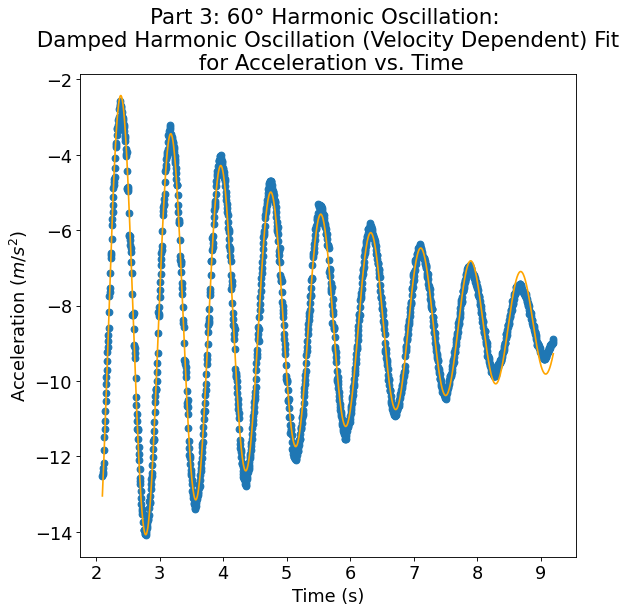

In [9]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(time, accel)
plt.plot(time, accel_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

# Axes label and title
plt.title("Part 3: 60° Harmonic Oscillation: \n Damped Harmonic Oscillation (Velocity Dependent) Fit \n for Acceleration vs. Time", wrap=True)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
plt.show()


In [10]:
# How many neighboring points to compare to for min/max criteria
max_indices = sig.find_peaks(force, distance=100)[0]
min_indices = sig.find_peaks(-1*force, distance=100)[0]

a_max = force[max_indices]
t_max = time[max_indices]

a_min = force[min_indices]
t_min = time[min_indices]


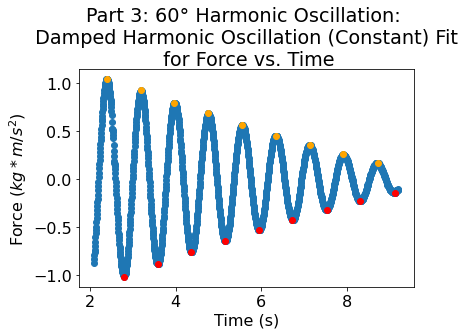

In [11]:
plt.scatter(time, force)
plt.scatter(t_max, a_max, color='orange')
plt.scatter(t_min, a_min, color='red')
# Axes label and title
plt.title("Part 3: 60° Harmonic Oscillation: \n Damped Harmonic Oscillation (Constant) Fit \n for Force vs. Time", wrap=True)
plt.xlabel("Time (s)")
plt.ylabel("Force $(kg*m/s^2)$")
# plt.xlim(3.9, 4.1)
plt.show()


In [14]:
# difference between peak amplitudes
difference = t_min - t_max
print(difference)

[2.395 3.19  3.975 4.76  5.555 6.345 7.125 7.91  8.71 ]
[2.8   3.59  4.37  5.16  5.95  6.725 7.52  8.305 9.12 ]
[0.405 0.4   0.395 0.4   0.395 0.38  0.395 0.395 0.41 ]
